In [2]:
import scipy.io.wavfile

samplerate, data = scipy.io.wavfile.read("split_.wav")

In [11]:

from scipy.io import wavfile
fs, Audiodata = wavfile.read("split_.wav")

Text(0.5,1,'Audio signal in time')

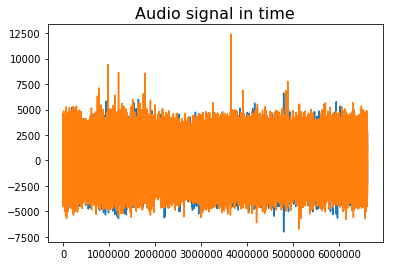

In [13]:
# Plot the audio signal in time
import matplotlib.pyplot as plt
%matplotlib inline  

plt.plot(Audiodata)
plt.title('Audio signal in time',size=16)

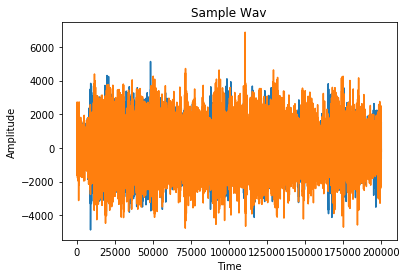

In [33]:

from scipy.io.wavfile import read
import matplotlib.pyplot as plt

# read audio samples
input_data = read("split_.wav")
audio = input_data[1]
# plot the first 1024 samples
plt.plot(audio[3800000:4000000])
# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time")
# set the title  
plt.title("Sample Wav")
# display the plot
plt.show()


In [8]:
print((samplerate))
print(len(data))

44100
5733376


In [ ]:
from scipy.io import wavfile
from matplotlib import pyplot as plt
import numpy as np

# Load the data and calculate the time of each sample
samplerate, data = wavfile.read('split.wav')
times = np.arange(len(data))/float(samplerate)

# Make the plot
# You can tweak the figsize (width, height) in inches
plt.figure(figsize=(30, 4))
plt.fill_between(times, data[:,0], data[:,1], color="blue")
plt.xlabel('time (s)')
plt.ylabel('amplitude')
# You can set the format by changing the extension
# like .pdf, .svg, .eps
plt.savefig('plot.png', dpi=100)
# plt.show()

In [1]:
import thinkdsp

In [2]:
hiss = thinkdsp.read_wave('split.wav')
hiss.make_audio()

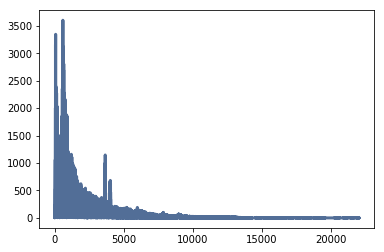

In [9]:
spectrum = hiss.make_spectrum()
spectrum.plot()

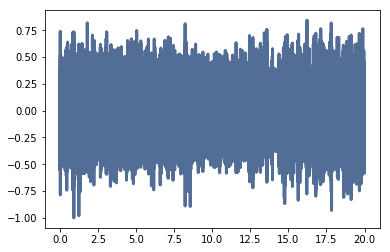

In [11]:
hiss.plot()

In [12]:
hiss.normalize()

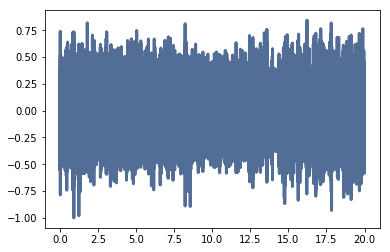

In [14]:
hiss.plot()

In [22]:
whistle = hiss.segment(1, 1.1)
whistle.make_audio()

In [35]:
w_final = hiss.segment(17,17.1)
w_final.make_audio()

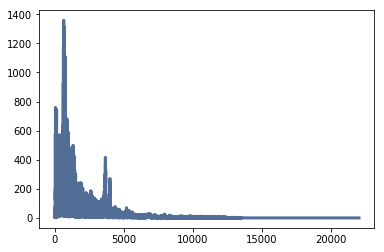

In [38]:
spectrum_wf = w_final.make_spectrum()
spectrum_wf.plot()

In [40]:
# from https://stackoverflow.com/questions/33933842/how-to-generate-noise-in-frequency-range-with-numpy
def fftnoise(f):
    f = np.array(f, dtype='complex')
    Np = (len(f) - 1) // 2
    phases = np.random.rand(Np) * 2 * np.pi
    phases = np.cos(phases) + 1j * np.sin(phases)
    f[1:Np+1] *= phases
    f[-1:-1-Np:-1] = np.conj(f[1:Np+1])
    return np.fft.ifft(f).real

def band_limited_noise(min_freq, max_freq, samples=1024, samplerate=1):
    freqs = np.abs(np.fft.fftfreq(samples, 1/samplerate))
    f = np.zeros(samples)
    f[np.logical_and(freqs>=min_freq, freqs<=max_freq)] = 1
    return fftnoise(f)

In [47]:
import librosa

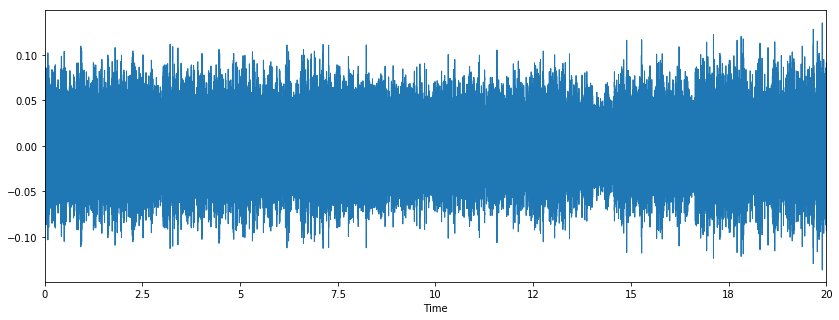

In [52]:
import matplotlib.pyplot as plt
import librosa.display

x, sr = librosa.load('split.wav')

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

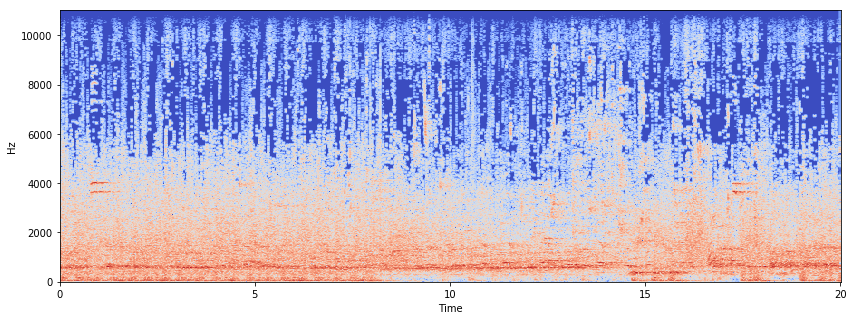

In [56]:

X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

In [57]:
import IPython.display as ipd


In [58]:
ipd.Audio(x, rate=sr)

In [60]:
import scipy as sp

In [66]:
from scipy.io import wavfile
fs, Audiodata = wavfile.read("split_.wav")

In [67]:
ft = sp.fft(Audiodata)

In [68]:
ft

array([[ 915.+0.j, 3353.+0.j],
       [1066.+0.j, 3420.+0.j],
       [1378.+0.j, 3172.+0.j],
       ...,
       [1373.+0.j,  331.+0.j],
       [2012.+0.j, -104.+0.j],
       [2419.+0.j, -563.+0.j]])

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Amplitude')

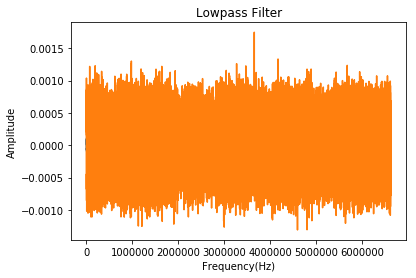

In [70]:
from scipy import signal

c,d = signal.butter(5, 380/(fs/2), btype='lowpass') # ButterWorth low-filter
newFilteredSignal = signal.lfilter(c,d,ft) # Applying the filter to the signal
plt.plot(newFilteredSignal) # plotting the signal.
plt.title('Lowpass Filter')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude')